# Descriptive Data

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
from scipy.stats import spearmanr
import seaborn as sns

In [15]:
dmeeting = pd.read_parquet('./data/data_meeting.parquet')
data_agenda1 = pd.read_parquet('./data/data_agenda1.parquet')
data_agenda2 = pd.read_parquet('./data/data_agenda2.parquet')
data_agenda3 = pd.read_parquet('./data/data_agenda3.parquet')
data_speech1 = pd.read_parquet('./data/data_speech1.parquet')
data_speech2 = pd.read_parquet('./data/data_speech2.parquet')
data_speech3 = pd.read_parquet('./data/data_speech3.parquet')
parMem = pd.read_parquet('./data/parliament_members.parquet')

dagenda = pd.concat([data_agenda1, data_agenda2, data_agenda3], axis=0)
dspeech = pd.concat([data_speech1, data_speech2, data_speech3], axis=0)

## Meeting Data

In [16]:
dmeeting

,meeting_id,url,date,day,time_start
0,1,https://www.ft.dk/forhandlinger/20091/20091M09...,2010-05-26,Onsdag,13.00
1,2,https://www.ft.dk/forhandlinger/20091/20091M08...,2010-04-23,Fredag,10.00
2,3,https://www.ft.dk/forhandlinger/20101/20101M04...,2011-02-02,Onsdag,13.00
3,4,https://www.ft.dk/forhandlinger/20091/20091M03...,2009-12-10,Torsdag,10.00
4,5,https://www.ft.dk/forhandlinger/20091/20091M10...,2010-09-07,Tirsdag,10.00
...,...,...,...,...,...
1782,1783,https://www.ft.dk/forhandlinger/20081/20081M07...,2009-03-26,Torsdag,10.00
1783,1784,https://www.ft.dk/forhandlinger/20081/20081M06...,2009-03-17,Tirsdag,13.00
1784,1785,https://www.ft.dk/forhandlinger/20081/20081M02...,2008-11-21,Fredag,10.00
1785,1786,https://www.ft.dk/forhandlinger/20072/20072M01...,2008-01-09,Onsdag,13.00


In [17]:
print(f"First Meeting date: {dmeeting['date'].min()}")
print(f"Last Meeting date: {dmeeting['date'].max()}")

First Meeting date: 2007-10-02 00:00:00
Last Meeting date: 2023-09-07 00:00:00


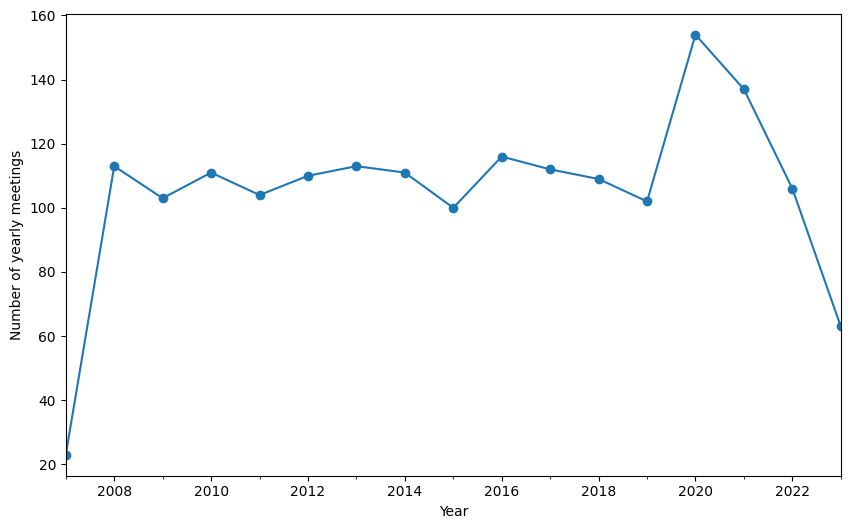

In [18]:
year_freq = dmeeting['date'].dt.to_period('Y').value_counts().sort_index()
plt.figure(figsize=(10,6))
year_freq.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of yearly meetings');

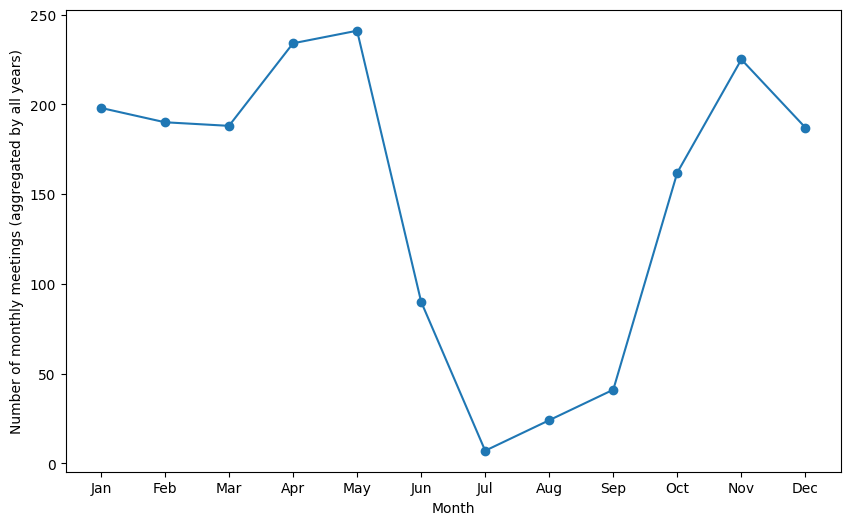

In [19]:
month_freq = dmeeting.groupby(dmeeting['date'].dt.month).size().sort_index()
month_freq
plt.figure(figsize=(10,6))
month_freq.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of monthly meetings (aggregated by all years)')
month_names = [calendar.month_abbr[month] for month in month_freq.index]
plt.xticks(month_freq.index, month_names);

In [20]:
dmeeting['day'].value_counts()

Tirsdag    486
Torsdag    464
Onsdag     443
Fredag     347
Mandag      47
Name: day, dtype: int64

In [21]:
dmeeting['time_start'].value_counts()[0:10]

13.00    768
10.00    767
9.00      79
12.00     56
10.15     18
11.00      8
09.00      7
14.30      5
13.15      5
13.20      4
Name: time_start, dtype: int64

## Agenda Data

In [22]:
dagenda

,meeting_id,agenda_item_id,title,type,speech_item_text,time_start,time_end,duration,number_of_words
0,1,1,Spm. nr. US 149,2,Tak. Den tidligere transportminister var optag...,13:00:56,13:03:17,141.0,430
1,1,2,Spm nr. US 150,2,Tak for det. Mit spørgsmål drejer sig også om ...,13:03:22,13:08:24,302.0,926
2,1,3,Spm. nr. US 151,2,"Tak for det. Først vil jeg sige, at der jo er ...",13:08:33,13:13:26,293.0,881
3,1,4,Spm. nr. US 152,2,"Inden jeg lige starter mit spørgsmål, vil jeg ...",13:13:41,13:20:08,387.0,1110
4,1,5,Spm. nr. US 153,2,"Regeringen fremlagde jo i går aftalen, som man...",13:20:26,13:29:11,525.0,1643
...,...,...,...,...,...,...,...,...,...
15237,1787,18,Spm. nr. S 1435: Om Vestas og Coloplast.,2,"Det har været nogle rigtig nyttige møder, som ...",15:01:33,15:10:16,523.0,1332
15238,1787,19,Spm. nr. S 1436: Om reglerne om arbejdsfordeling.,2,"Spørgeren har tilsyneladende det udgangspunkt,...",15:10:36,15:21:34,658.0,1805
15239,1787,20,Spm. nr. S 1444: Om kommunernes jobcentre.,2,Det nye enstrengede kommunale beskæftigelsessy...,15:22:17,15:36:53,876.0,2295
15240,1787,21,Spm. nr. S 1423: Om de rytmiske spillesteder.,2,I sidste uge holdt jeg et godt og konstruktivt...,15:37:26,15:49:54,748.0,2343


In [23]:
dagenda['type'].value_counts()

0    7773
2    7108
1     361
Name: type, dtype: int64

In [24]:
dagenda.groupby('type')['number_of_words'].mean().reset_index(name='Mean number of words per agenda item')

,type,Mean number of words per agenda item
0,0,8764.288434
1,1,1325.343490
2,2,1316.297411


In [25]:
number_of_speech_items_agenda = dspeech.groupby(['meeting_id', 'agenda_item_id']).size().reset_index(name='count')
pd.merge(dagenda, number_of_speech_items_agenda).groupby('type')['count'].mean().reset_index(name='Mean number of speech items per agenda item')

,type,Mean number of speech items per agenda item
0,0,39.858356
1,1,8.440443
2,2,8.004502


count    15242.000000
mean      1979.959192
std       3521.840785
min          4.000000
25%        424.000000
50%        614.000000
75%       2538.000000
max      58567.000000
Name: duration, dtype: float64

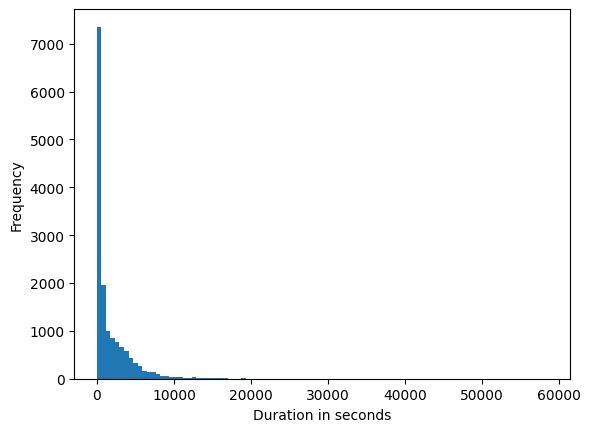

In [26]:
plt.hist(dagenda['duration'], bins = 100);
plt.xlabel('Duration in seconds')
plt.ylabel('Frequency')
dagenda['duration'].describe()

count     15242.000000
mean       5114.781853
std        8623.258257
min           6.000000
25%        1191.000000
50%        1716.000000
75%        6495.500000
max      145206.000000
Name: number_of_words, dtype: float64

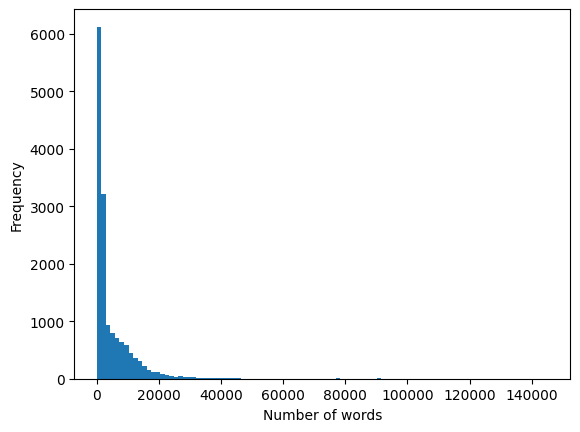

In [27]:
plt.hist(dagenda['number_of_words'], bins = 100);
plt.xlabel('Number of words')
plt.ylabel('Frequency')
dagenda['number_of_words'].describe()

Spearman correlation coefficient: 0.9840739755139365
P-value: 0.0


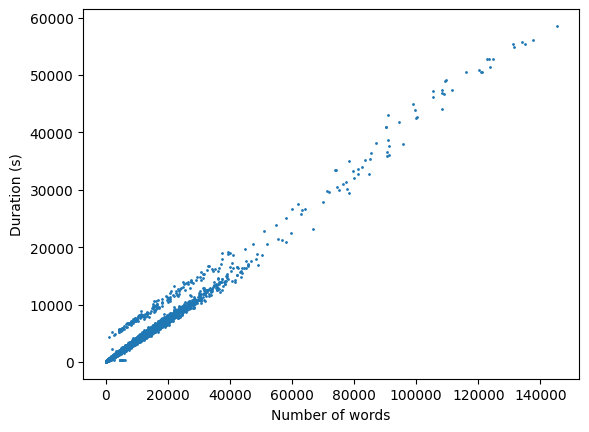

In [28]:
plt.scatter(x=dagenda['number_of_words'], y = dagenda['duration'], c=dagenda['type'], s=1, cmap='viridis'));
plt.xlabel('Number of words');
plt.ylabel('Duration (s)');
correlation_coefficient, p_value = spearmanr(dagenda['number_of_words'], dagenda['duration'])
print(f"Spearman correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

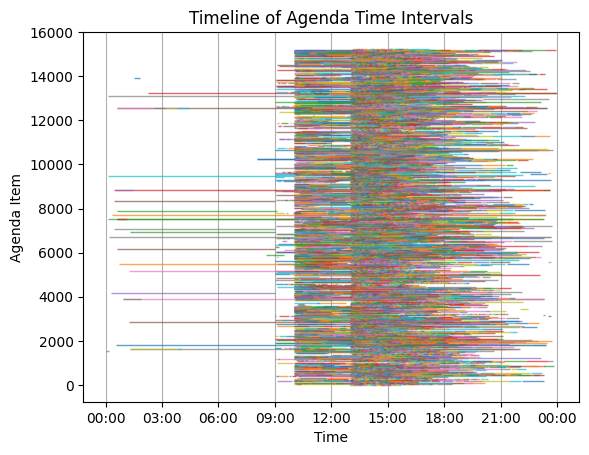

In [29]:
from matplotlib.dates import DateFormatter
import datetime

# Assuming 'start_times' and 'end_times' are your columns with start and end times
start_times = dagenda['time_start']
end_times = dagenda['time_end']

# Convert strings to datetime objects
start_times = [datetime.datetime.strptime(time, '%H:%M:%S') for time in start_times]
end_times = [datetime.datetime.strptime(time, '%H:%M:%S') for time in end_times]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the time intervals as horizontal lines on a timeline
for i, (start, end) in enumerate(zip(start_times, end_times)):
    ax.plot([start, end], [i, i], linewidth=1, solid_capstyle="butt", alpha=0.7)

# Beautify the plot
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
#plt.yticks(range(len(start_times)), [f'Task {i+1}' for i in range(len(start_times))])
plt.xlabel('Time')
plt.ylabel('Agenda Item')
plt.title('Timeline of Agenda Time Intervals')
plt.grid(axis='x')

plt.show()


## Speech Data

In [30]:
dspeech

,meeting_id,agenda_item_id,speech_item_id,time_start,time_end,speaker_name,speaker_party,speaker_role,speaker_title,speech_item_text,duration,number_of_words
0,1,1,1,13:00:56,13:01:34,Anne Baastrup,SF,medlem,Anne Baastrup(SF):,Tak. Den tidligere transportminister var optag...,38.0,103
1,1,1,3,13:01:38,13:02:11,Hans Christian Schmidt,V,minister,Transportministeren(Hans Christian Schmidt):,"Jamen jeg synes, at det er et meget godt spørg...",33.0,97
2,1,1,5,13:02:13,13:02:57,Anne Baastrup,SF,medlem,Anne Baastrup(SF):,"Det er jeg da glad for at høre, for den tidlig...",44.0,167
3,1,1,7,13:03:00,13:03:10,Hans Christian Schmidt,V,minister,Transportministeren(Hans Christian Schmidt):,"Jamen som spørgeren selv siger, er det klart, ...",10.0,46
4,1,1,9,13:03:12,13:03:17,Anne Baastrup,SF,medlem,Anne Baastrup(SF):,"Det var et rent spark, jeg sparker en åben dør...",5.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...
369757,1787,22,14,15:57:03,15:57:11,Carina Christensen,KF,minister,Kulturministeren(Carina Christensen):,"Jeg har ikke læst den artikel i Børsen, men je...",8.0,24
369758,1787,22,16,15:57:13,15:57:56,Leif Lahn Jensen,S,medlem,Leif Lahn Jensen(S):,Det var sådan set et svar - det kunne minister...,43.0,127
369759,1787,22,18,15:57:58,15:58:51,Carina Christensen,KF,minister,Kulturministeren(Carina Christensen):,Kulturinstitutionerne som helhed har ikke mærk...,53.0,184
369760,1787,22,20,15:58:56,16:00:05,Mogens Jensen,S,medlem,Mogens Jensen(S):,"Altså, ministerens regnestykke holder jo ikke....",69.0,165


count    369762.000000
mean         71.438212
std          68.714941
min           0.000000
25%          35.000000
50%          51.000000
75%          72.000000
max         793.000000
Name: duration, dtype: float64

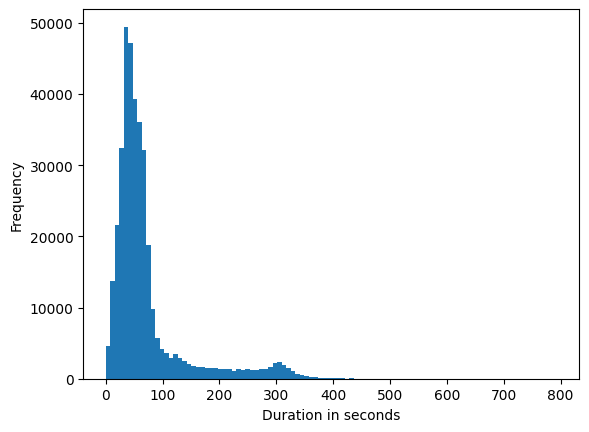

In [31]:
plt.hist(dspeech['duration'], bins = 100);
plt.xlabel('Duration in seconds')
plt.ylabel('Frequency')
dspeech['duration'].describe()

count    369762.000000
mean        210.836984
std         231.257440
min           1.000000
25%         103.000000
50%         151.000000
75%         218.000000
max        6332.000000
Name: number_of_words, dtype: float64

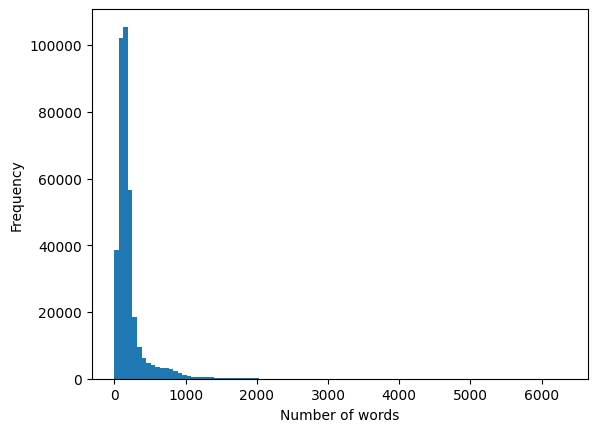

In [32]:
plt.hist(dspeech['number_of_words'], bins = 100);
plt.xlabel('Number of words')
plt.ylabel('Frequency')
dspeech['number_of_words'].describe()

Spearman correlation coefficient: 0.9527785587714358
P-value: 0.0


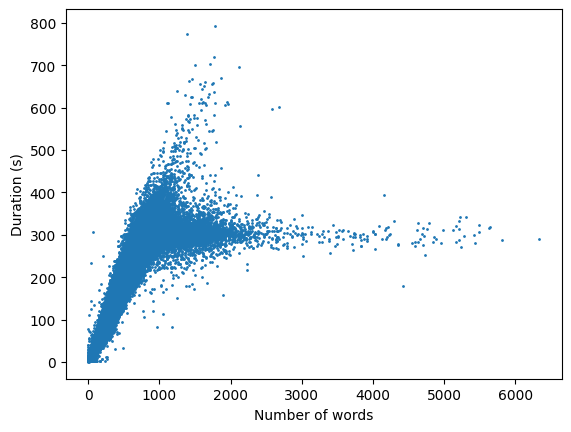

In [33]:
plt.scatter(x=dspeech['number_of_words'], y = dspeech['duration'], s=1);
plt.xlabel('Number of words');
plt.ylabel('Duration (s)');
correlation_coefficient, p_value = spearmanr(dspeech['number_of_words'], dspeech['duration'])
print(f"Spearman correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

In [34]:
dspeech['speaker_name'].value_counts()[0:25]

Mette Frederiksen         4294
Ole Birk Olesen           4263
Per Clausen               4195
Inger Støjberg            3539
Finn Sørensen             3379
Morten Messerschmidt      3287
Christian Juhl            3282
Lars Løkke Rasmussen      3162
Martin Henriksen          3101
Morten Bødskov            3042
Frank Aaen                2945
Karsten Lauritzen         2940
Benny Engelbrecht         2914
Peter Skaarup             2814
Lisbeth Bech Poulsen      2747
Morten Østergaard         2717
Simon Emil Ammitzbøll     2714
Mattias Tesfaye           2633
Hans Kristian Skibby      2630
Line Barfod               2629
Bent Bøgsted              2600
Kristian Thulesen Dahl    2549
Rasmus Prehn              2486
Erling Bonnesen           2465
Nick Hækkerup             2436
Name: speaker_name, dtype: int64

In [35]:
dspeech['speaker_party'].value_counts()

S      77987
V      68789
DF     48675
EL     41317
SF     32832
KF     28419
RV     25092
LA     19777
ALT     9572
NB      6151
UFG     2273
DD      1782
M       1569
IA      1395
KD       822
FG       655
SIU      646
JF       570
NY       537
SP       376
T        287
TF       142
NQ        97
Name: speaker_party, dtype: int64

In [36]:
dspeech['speaker_role'].value_counts()

medlem                 304410
minister                64820
fungerende minister       532
Name: speaker_role, dtype: int64

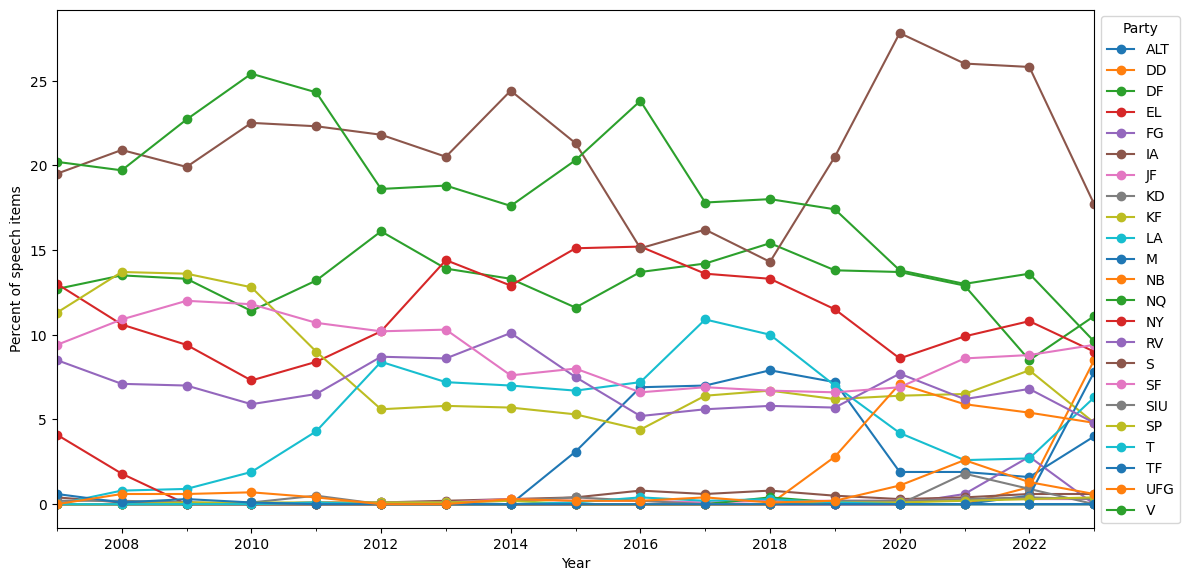

In [37]:
dspeech_year = pd.merge(dspeech, dmeeting[['meeting_id', 'date']])
dspeech_year['year'] = dspeech_year['date'].dt.to_period('Y')
number_of_speech_years = dspeech_year.groupby('year').size().reset_index(name='number_of_speech_year')
party_year = dspeech_year.groupby(['speaker_party', 'year']).size().reset_index(name='Counts')
party_year = pd.merge(party_year, number_of_speech_years, on='year')
party_year['Percent'] = round((party_year['Counts'] / party_year['number_of_speech_year'])*100, 1)
party_year_pivot = party_year.pivot(index='year', columns='speaker_party', values='Percent').fillna(0)

ax = party_year_pivot.plot(kind='line', marker='o', figsize=(12, 6))

plt.xlabel('Year')
plt.ylabel('Percent of speech items')
plt.legend(title='Party')
ax.legend(title='Party', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout() 
plt.show()

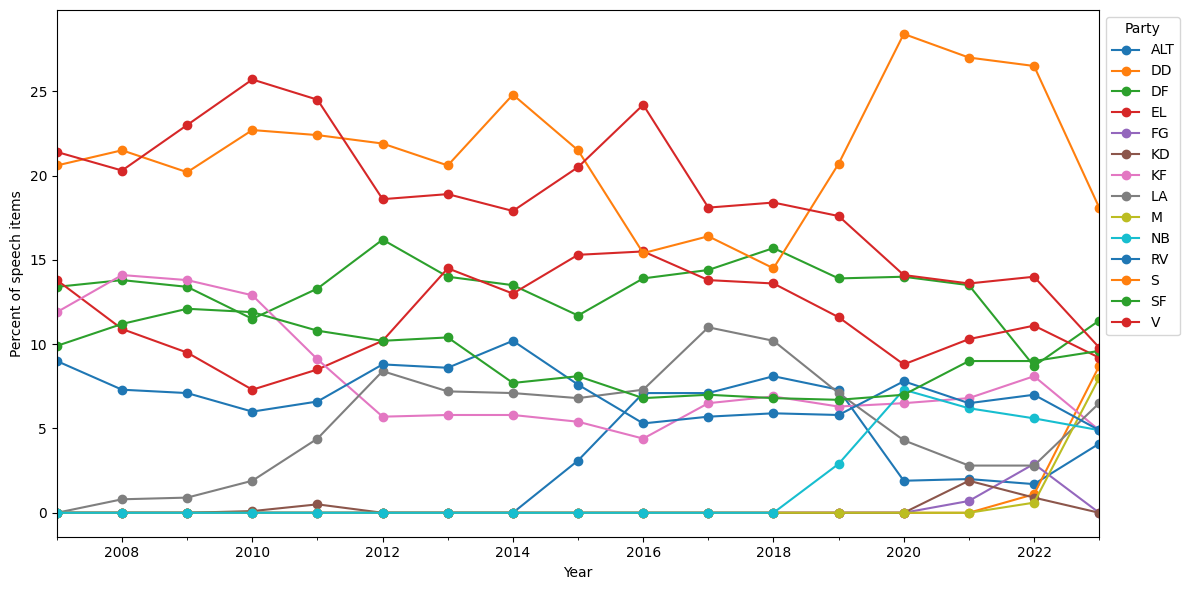

In [38]:
dspeech_year = pd.merge(dspeech, dmeeting[['meeting_id', 'date']])
dspeech_year['year'] = dspeech_year['date'].dt.to_period('Y')
dspeech_year = dspeech_year[dspeech_year['speaker_party'].isin(['S', 'DF', 'ALT', 'DD', 'EL', 'FG', 'KD', 'KF', 'LA', 'M', 'NB', 'RV', 'S', 'SF', 'V'])]
number_of_speech_years = dspeech_year.groupby('year').size().reset_index(name='number_of_speech_year')
party_year = dspeech_year.groupby(['speaker_party', 'year']).size().reset_index(name='Counts')
party_year = pd.merge(party_year, number_of_speech_years, on='year')
party_year['Percent'] = round((party_year['Counts'] / party_year['number_of_speech_year'])*100, 1)
party_year_pivot = party_year.pivot(index='year', columns='speaker_party', values='Percent').fillna(0)

ax = party_year_pivot.plot(kind='line', marker='o', figsize=(12, 6))

plt.xlabel('Year')
plt.ylabel('Percent of speech items')
plt.legend(title='Party')
ax.legend(title='Party', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout() 
plt.show()

## Parliament Members

In [66]:
parMem

,speaker_name,speaker_party,period_start,period_end
0,Thomas Adelskov,Socialdemokratiet,2005-02-08,2007-11-13
1,Simon Emil Ammitzbøll,Det Radikale Venstre,2005-02-08,2007-11-13
2,Hans Andersen,Venstre,2005-02-08,2007-11-13
3,Jytte Andersen,Socialdemokratiet,2005-02-08,2007-11-13
4,Kim Andersen,Venstre,2005-02-08,2007-11-13
...,...,...,...,...
1069,Theresa Scavenius,Alternativet,2022-11-01,2023-09-07
1070,Anna Falkenberg,Sambandsflokkurin,2022-11-01,2023-09-07
1071,Sjúrður Skaale,Javnaðarflokkurin,2022-11-01,2023-09-07
1072,Aaja Chemnitz Driefer,Inuit Ataqatigiit,2022-11-01,2023-09-07
